# Text Classification using  Naive Bayes
### Based on IMDB dataset

Source Annexe : https://web.stanford.edu/~jurafsky/slp3/slides/7_NB.pdf

In [35]:
import numpy as np
import pandas as pd
import string
from collections import Counter
from sklearn.model_selection import train_test_split
import glob
import seaborn as sns

In [36]:
pos_list=glob.glob(pathname="./data/movie-reviews-en/train/pos/*.txt")
neg_list=glob.glob(pathname="./data/movie-reviews-en/train/neg/*.txt")

In [37]:
n_word = 10000    #Nb of words to keep in the vocabulary

In [38]:
# Function to get all text files as a list of string
def get_text_list(file_list):
    text_list = []
    
    for file in file_list:
        
        with open(file,'r') as f:
            text_list.append(f.read())
            
    return(text_list)
        
pos_text = ' '.join(get_text_list(pos_list))
neg_text = ' '.join(get_text_list(neg_list))

### Small Preprocessing

Remove punctuation and line escape char '\n'

Then we only keep the n_word most occuring word across all text

In [39]:
pos_text = pos_text.translate(str.maketrans('','', string.punctuation))
pos_text = pos_text.replace('\n','')
pos_count = dict(Counter(pos_text.split()).most_common(n_word))

neg_text = neg_text.translate(str.maketrans('','', string.punctuation))
neg_text = neg_text.replace('\n','')
neg_count = dict(Counter(neg_text.split()).most_common(n_word))

In [40]:
words = list(pos_count.keys())[90:100]
values = list(neg_count.values())[90:100]

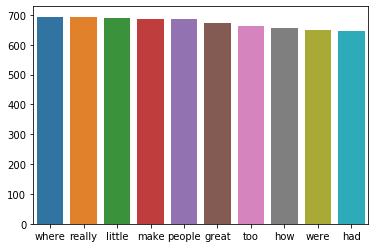

In [41]:
sns.barplot(x=words, y=values)

### Probabilty functions

In [42]:
#Return the probabilty to have the input word knowing the class
#P(wi|Cj)
#P('nice'|Positive)
# With Laplace Smoothing

def proba_word(word,counter):    
    
    try: 
        
        # If the word is in our Vocabulary
        r = (counter[word]+1)/(sum(counter.values())+len(counter))
        
    except KeyError:
        # Else counter[word] = 0 
        r = (1)/(sum(counter.values())+len(counter))
        
    return(np.float64(r))

In [43]:
#Compute the sum of the log probabilities of each word in the input text

def proba_text(text,counter):   
    
    probs=[]
    
    for word in list(set(text.split())):
        probs.append(np.log(proba_word(word,counter)))
        
    return(np.sum(probs))

### Building our model

In [44]:
def NBmodel(text_array,counter):
    
    predictions = []
    neg_count,pos_count = counter
    
    for text in text_array:
        
        probs = [proba_text(text,neg_count),proba_text(text,pos_count)]
        predictions.append(np.argmax(probs))
        
    return(predictions)

### Testing on the test set

In [45]:
pos_test_list = glob.glob(pathname="./data/movie-reviews-en/test/pos/*.txt")
neg_test_list = glob.glob(pathname="./data/movie-reviews-en/test/neg/*.txt")

In [46]:
pos_test_text = get_text_list(pos_test_list)      
neg_test_text = get_text_list(neg_test_list)

In [47]:
for i in range(0,len(pos_test_text)):
    pos_test_text[i] = pos_test_text[i].translate(str.maketrans('','', string.punctuation))
    pos_test_text[i] = pos_test_text[i].replace('\n','')

for i in range(0,len(neg_test_text)):
    neg_test_text[i] = neg_test_text[i].translate(str.maketrans('','', string.punctuation))
    neg_test_text[i] = neg_test_text[i].replace('\n','')

In [48]:
pos_results = NBmodel(pos_test_text,[neg_count,pos_count])
neg_results = NBmodel(neg_test_text,[neg_count,pos_count])

In [49]:
f" Negative Accuracy : {(len(neg_results)-np.sum(neg_results))/(len(neg_results))} "

' Negative Accuracy : 0.95 '

In [50]:
f"Positive Accuracy : {np.sum(pos_results)/(len(pos_results))}"

'Positive Accuracy : 0.7'

In [51]:
TP = np.sum(pos_results)
TN = len(neg_results)-np.sum(neg_results)
FP = len(pos_results)-np.sum(pos_results)
FN = np.sum(neg_results)

z = np.array([[TP,FP],[FN,TN]])
z

array([[70, 30],
       [ 5, 95]], dtype=int64)

In [52]:
f"Global Accuracy : {(TP+TN)/(TP+TN+FP+FN)}"

'Global Accuracy : 0.825'

### Now with a bit of Preprocessing

Removing stop words using ntlk package

In [53]:
import nltk
from nltk.corpus import stopwords
import re 
stopwords = set(stopwords.words('english'))

for word in stopwords:
    pos_text = re.sub(' '+ word+' ',' ',pos_text)
    neg_text = re.sub(' '+ word+' ',' ',neg_text)


In [54]:
pos_count = dict(Counter(pos_text.split()).most_common(n_word))
neg_count = dict(Counter(neg_text.split()).most_common(n_word))

In [55]:
for word in stopwords:
    for i in range(0,len(pos_test_text)):
        pos_test_text[i] = re.sub(' '+ word+' ',' ',pos_test_text[i])
        neg_test_text[i] = re.sub(' '+ word+' ',' ',neg_test_text[i])

Accuracy

In [56]:
neg_results = NBmodel(neg_test_text,[neg_count,pos_count])
f"Negative Accuracy : {(len(neg_results)-np.sum(neg_results))/(len(neg_results))}"

'Negative Accuracy : 0.91'

In [57]:
pos_results = NBmodel(pos_test_text,[neg_count,pos_count])
f"Positive Accuracy : {np.sum(pos_results)/(len(pos_results))}"

'Positive Accuracy : 0.72'

Confusion Matrix

In [58]:
TP = np.sum(pos_results)
TN = len(neg_results)-np.sum(neg_results)
FP = len(pos_results)-np.sum(pos_results)
FN = np.sum(neg_results)

z = np.array([[TP,FP],[FN,TN]])
z

array([[72, 28],
       [ 9, 91]], dtype=int64)

In [59]:
f"Global Accuracy : {(TP+TN)/(TP+TN+FP+FN)}"

'Global Accuracy : 0.815'

### Testing Stemmer

Testing nltk english stemmer

Restart from scratch because we have removed stop words

In [60]:
from nltk.stem.snowball import SnowballStemmer

pos_list=glob.glob(pathname="./data/movie-reviews-en/train/pos/*.txt")
neg_list=glob.glob(pathname="./data/movie-reviews-en/train/neg/*.txt")

pos_text = ' '.join(get_text_list(pos_list))
neg_text = ' '.join(get_text_list(neg_list))

pos_text = pos_text.translate(str.maketrans('','', string.punctuation))
pos_text = pos_text.replace('\n','')

neg_text = neg_text.translate(str.maketrans('','', string.punctuation))
neg_text = neg_text.replace('\n','')

stem_pos_text = []
stem_neg_text = []
EnglishSnowballStemmer = SnowballStemmer("english")

for w in pos_text.split():
    
    if w != ' ':
        stemword = EnglishSnowballStemmer.stem(w)
        stem_pos_text.append(stemword)
        
for w in neg_text.split():
    
    if w != ' ':
        stemword = EnglishSnowballStemmer.stem(w)
        stem_neg_text.append(stemword)
        

In [61]:
stem_pos_count = dict(Counter(stem_pos_text).most_common(n_word))
stem_neg_count = dict(Counter(stem_neg_text).most_common(n_word))

In [62]:
pos_test_list = glob.glob(pathname="./data/movie-reviews-en/test/pos/*.txt")
neg_test_list = glob.glob(pathname="./data/movie-reviews-en/test/neg/*.txt")

pos_test_text = get_text_list(pos_test_list)      
neg_test_text = get_text_list(neg_test_list)

Using the english snowball stemmer

In [63]:
for i in range(0,len(pos_test_text)):
    pos_test_text[i] = pos_test_text[i].translate(str.maketrans('','', string.punctuation))
    pos_test_text[i] = pos_test_text[i].replace('\n','')
    pos_test_text[i] = ' '.join(EnglishSnowballStemmer.stem(w) for w in pos_test_text[i].split())

for i in range(0,len(neg_test_text)):
    neg_test_text[i] = neg_test_text[i].translate(str.maketrans('','', string.punctuation))
    neg_test_text[i] = neg_test_text[i].replace('\n','')
    neg_test_text[i] = ' '.join(EnglishSnowballStemmer.stem(w) for w in neg_test_text[i].split())


Accuracy

In [64]:
pos_results = NBmodel(pos_test_text,[stem_neg_count,stem_pos_count])
neg_results = NBmodel(neg_test_text,[stem_neg_count,stem_pos_count])

print(f"Negative Accuracy : {(len(neg_results)-np.sum(neg_results))/(len(neg_results))}")
print(f"Positive Accuracy : {np.sum(pos_results)/(len(pos_results))}")

Negative Accuracy : 0.92
Positive Accuracy : 0.73


Confusion matrix

In [65]:
TP = np.sum(pos_results)
TN = len(neg_results)-np.sum(neg_results)
FP = len(pos_results)-np.sum(pos_results)
FN = np.sum(neg_results)

z = np.array([[TP,FP],[FN,TN]])
z

array([[73, 27],
       [ 8, 92]], dtype=int64)

In [66]:
f"Global Accuracy : {(TP+TN)/(TP+TN+FP+FN)}"

'Global Accuracy : 0.825'

### Lemmer

In [67]:
from nltk.stem import WordNetLemmatizer

pos_list=glob.glob(pathname="./data/movie-reviews-en/train/pos/*.txt")
neg_list=glob.glob(pathname="./data/movie-reviews-en/train/neg/*.txt")

pos_text = ' '.join(get_text_list(pos_list))
neg_text = ' '.join(get_text_list(neg_list))

pos_text = pos_text.translate(str.maketrans('','', string.punctuation))
pos_text = pos_text.replace('\n','')

neg_text = neg_text.translate(str.maketrans('','', string.punctuation))
neg_text = neg_text.replace('\n','')

lemm_pos_text = []
lemm_neg_text = []

wordnet_lemmatizer = WordNetLemmatizer()

for w in pos_text.split():
    
    if w != ' ':
        lemmword = wordnet_lemmatizer.lemmatize(w)
        lemm_pos_text.append(lemmword)
        
for w in neg_text.split():
    
    if w != ' ':
        lemmword = wordnet_lemmatizer.lemmatize(w)
        lemm_neg_text.append(lemmword)

In [68]:
lemm_pos_count = dict(Counter(lemm_pos_text).most_common(n_word))
lemm_neg_count = dict(Counter(lemm_neg_text).most_common(n_word))

In [69]:
pos_test_list = glob.glob(pathname="./data/movie-reviews-en/test/pos/*.txt")
neg_test_list = glob.glob(pathname="./data/movie-reviews-en/test/neg/*.txt")

pos_test_text = get_text_list(pos_test_list)      
neg_test_text = get_text_list(neg_test_list)

In [70]:
for i in range(0,len(pos_test_text)):
    pos_test_text[i] = pos_test_text[i].translate(str.maketrans('','', string.punctuation))
    pos_test_text[i] = pos_test_text[i].replace('\n','')
    pos_test_text[i] = ' '.join(wordnet_lemmatizer.lemmatize(w) for w in pos_test_text[i].split())

for i in range(0,len(neg_test_text)):
    neg_test_text[i] = neg_test_text[i].translate(str.maketrans('','', string.punctuation))
    neg_test_text[i] = neg_test_text[i].replace('\n','')
    neg_test_text[i] = ' '.join(wordnet_lemmatizer.lemmatize(w) for w in neg_test_text[i].split())

In [71]:
pos_results = NBmodel(pos_test_text,[lemm_neg_count,lemm_pos_count])
neg_results = NBmodel(neg_test_text,[lemm_neg_count,lemm_pos_count])

print(f"Negative Accuracy : {(len(neg_results)-np.sum(neg_results))/(len(neg_results))}")
print(f"Positive Accuracy : {np.sum(pos_results)/(len(pos_results))}")

Negative Accuracy : 0.94
Positive Accuracy : 0.73


In [72]:
TP = np.sum(pos_results)
TN = len(neg_results)-np.sum(neg_results)
FP = len(pos_results)-np.sum(pos_results)
FN = np.sum(neg_results)

z = np.array([[TP,FP],[FN,TN]])
z

array([[73, 27],
       [ 6, 94]], dtype=int64)

In [73]:
f"Global Accuracy : {(TP+TN)/(TP+TN+FP+FN)}"

'Global Accuracy : 0.835'